### **IMPORTS**

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import cleaning as cl   
import transforming as tr
import sys
sys.path.append('../model_training/')
from xgb_model import XGBModel

# **DATA UNDERSTANDING**

### **CV'S PATHS**

In [2]:
paths = {
    "pacientes": '../../data/raw_2/pacientes_data.csv',
    "caqueta": '../../data/raw/caqueta_data.csv',
    "narino": '../../data/raw/Narino_data.csv',
    "putumayo": '../../data/raw/Putumayo_data.csv',
    "caqueta_2": '../../data/raw_2/caqueta_data_2.csv',
    "narino_2": '../../data/raw_2/Narino_data_2.csv',
    "putumayo_2": '../../data/raw_2/Putumayo_data_2.csv',
}

### **READ AND NAME CSV'S**

In [3]:
pacientes_df = pd.read_csv(paths["pacientes"], low_memory=False)
caqueta_df = pd.read_csv(paths["caqueta"], low_memory=False)
narino_df = pd.read_csv(paths["narino"], low_memory=False)
putumayo_df = pd.read_csv(paths["putumayo"], low_memory=False)
caqueta_df_2 = pd.read_csv(paths["caqueta_2"], low_memory=False)
narino_df_2 = pd.read_csv(paths["narino_2"], low_memory=False)
putumayo_df_2 = pd.read_csv(paths["putumayo_2"], low_memory=False)

caqueta_df.name = 'caqueta'
pacientes_df.name = 'pacientes'
narino_df.name = 'narino'
putumayo_df.name = 'putumayo'
caqueta_df_2.name = 'caqueta_2'
narino_df_2.name = 'narino_2'
putumayo_df_2.name = 'putumayo_2'

# **BEFORE CLEANING**

### **COLUMNS**

In [4]:
print("caqueta: ", list(caqueta_df_2))
print("narino: ", list(narino_df_2))
print("putumayo: ", list(putumayo_df_2))

caqueta:  ['Año', 'Mes', 'Grupo de Riesgo', 'Programa', 'Evento', 'Afiliados', 'OrigenBD', 'CodDepto', 'DesDepto', 'CodMpio', 'DescMpio', 'Latitud_Y_Mpio', 'Longitud_X_Mpio', 'tipo_usuario', 'Estado', 'FechaNovedadFallecido', 'tipo_identifiCAcion', 'Documento', 'ConCAtenar', 'nombre1', 'nombre2', 'apellido1', 'apellido2', 'FechaNac', 'Edad', 'CiclosV', 'DescrCiclosV', 'QuinQ', 'DescQuinQ', 'Género', 'Cod_Género', 'EnfoqueDif', 'Hecho Victimizante', 'RUV', 'Nivel_Educativo', 'Ocupación', 'Tipo de afiliado', 'Estado_Civil', 'Discapacidad', 'Tipo de Discapacidad', 'Condición de Discapacidad', 'Grado de Discapacidad', 'Pertenencia Étnica', 'MUNICIPIO DONDE VIVE', 'DIRECCIÓN DE DONDE VIVE', 'TELEFONOS DE CONTACTO', 'Zona', 'Cód_poblado', 'Nombre_poblado', 'Latitud_Afiliado', 'Longitud_Afiliado', 'Validación_Dirección_Afiliado', 'CodDepto_IPS', 'DesDepto_IPS', 'CodMpio_IPS', 'DescMpio_IPS', 'CodIPS', 'Nombre_IPS', 'Dirección_IPS', 'Barrio_IPS', 'Teléfono_IPS', 'Latitud_IPS', 'Longitud_IPS', 

In [5]:
def comparable_info(df1, df2):
    fig, axes = plt.subplots(2, 1, figsize=(16, 6))
    fig.suptitle("Missigness comparison")
    print("*************** {} ***************".format(df1.name))
    print(df1.info())
    print(df1.describe(include="all").T)

    msno.matrix(df1, ax=axes[0], sparkline=False)
    axes[0].set_title(("Missing Values Matrix for {}".format(df1.name)))

    print("*************** {} ***************".format(df2.name))
    print(df2.info())
    print(df2.describe(include="all").T)

    msno.matrix(df2, ax=axes[1], sparkline=False)
    axes[1].set_title(("Missing Values Matrix for {}".format(df2.name)))

    plt.show()


### **INFO CAQUETÁ**

*************** caqueta ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Columns: 150 entries, Año to Complicación Renales
dtypes: float64(95), int64(12), object(43)
memory usage: 2.1+ MB
None
                          count unique  \
Año                      1861.0    NaN   
Mes                      1861.0    NaN   
Grupo de Riesgo            1861      1   
Programa                   1861      1   
Evento                     1861      1   
...                         ...    ...   
Complicación Cardiaca       0.0    NaN   
Complicación Cerebral       0.0    NaN   
Complicación Retinianas     0.0    NaN   
Complicación Vascular       0.0    NaN   
Complicación Renales        0.0    NaN   

                                                                       top  \
Año                                                                    NaN   
Mes                                                                    NaN   
Grupo de Riesgo          Po

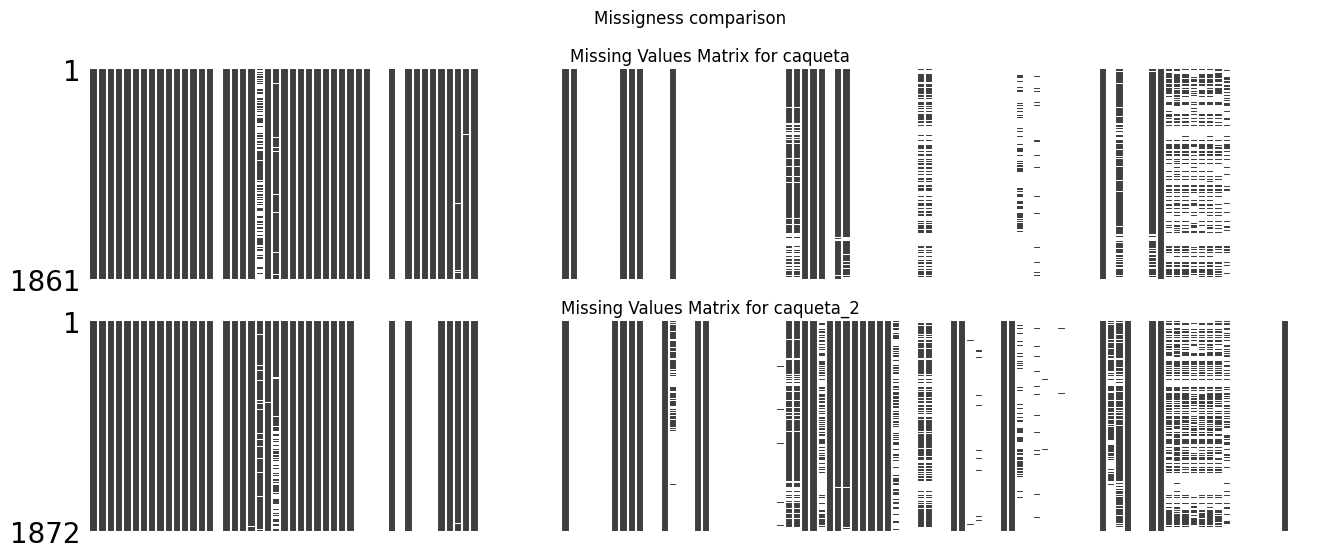

In [6]:
comparable_info(caqueta_df,caqueta_df_2)


### **INFO NARIÑO**

*************** narino ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4441 entries, 0 to 4440
Columns: 161 entries, Año to REPETIDO
dtypes: float64(44), int64(18), object(99)
memory usage: 5.5+ MB
None
                          count unique  \
Año                      4441.0    NaN   
Mes                      4441.0    NaN   
Grupo de Riesgo            4441      1   
Programa                   4441      1   
Evento                     4441      7   
...                         ...    ...   
Complicación Cerebral      4441      3   
Complicación Retinianas    4441      3   
Complicación Vascular      4441      3   
Complicación Renales       4441      3   
REPETIDO                    0.0    NaN   

                                                                       top  \
Año                                                                    NaN   
Mes                                                                    NaN   
Grupo de Riesgo          Población con r

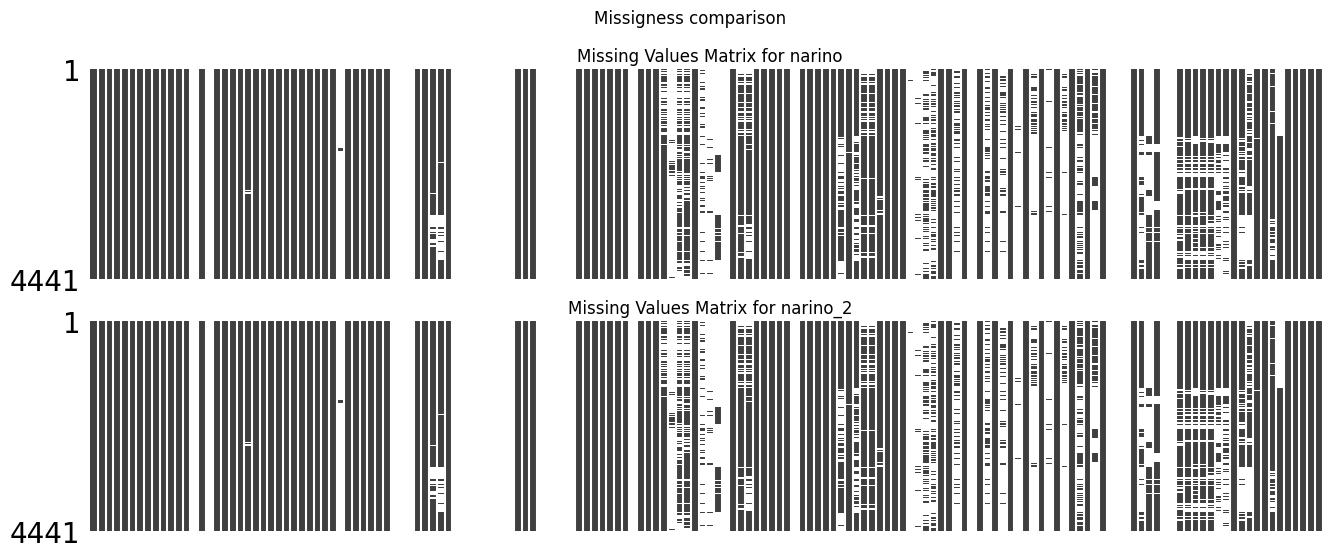

In [7]:
comparable_info(narino_df,narino_df_2)


### **INFO PUTUMAYO**

*************** putumayo ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Columns: 177 entries, Año to OBSERVACIONES
dtypes: float64(39), int64(16), object(122)
memory usage: 1.2+ MB
None
                         count unique  \
Año                      856.0    NaN   
Mes                      856.0    NaN   
Grupo de Riesgo            856      1   
Programa                   856      1   
Evento                     856      5   
...                        ...    ...   
Complicación Cerebral      856      5   
Complicación Retinianas    856      4   
Complicación Vascular      856      3   
Complicación Renales       856      4   
OBSERVACIONES               94     42   

                                                                       top  \
Año                                                                    NaN   
Mes                                                                    NaN   
Grupo de Riesgo          Población con riesgo 

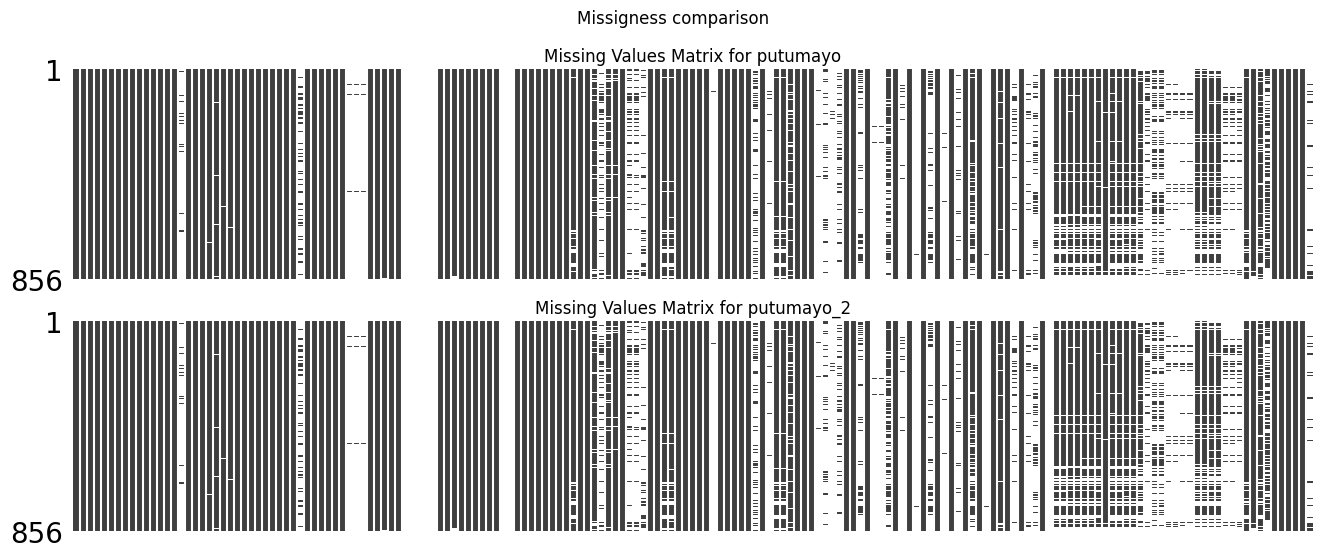

In [8]:
comparable_info(putumayo_df,putumayo_df_2)

### **INFO PACIENTS**

*************** pacientes ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65819 entries, 0 to 65818
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID Afiliado               65819 non-null  object 
 1   Región                    65819 non-null  object 
 2   UT                        65819 non-null  object 
 3   Primer Nombre             65819 non-null  object 
 4   Segundo Nombre            53684 non-null  object 
 5   Primer Apellido           65819 non-null  object 
 6   Segundo Apellido          63451 non-null  object 
 7   Tipo de Documento         65819 non-null  object 
 8   Número de Documento       65819 non-null  int64  
 9   Celular                   26129 non-null  object 
 10  Correo                    8197 non-null   object 
 11  Sexo                      65819 non-null  object 
 12  Fecha de Afiliación       65819 non-null  object 
 13  Fecha Nacimiento   

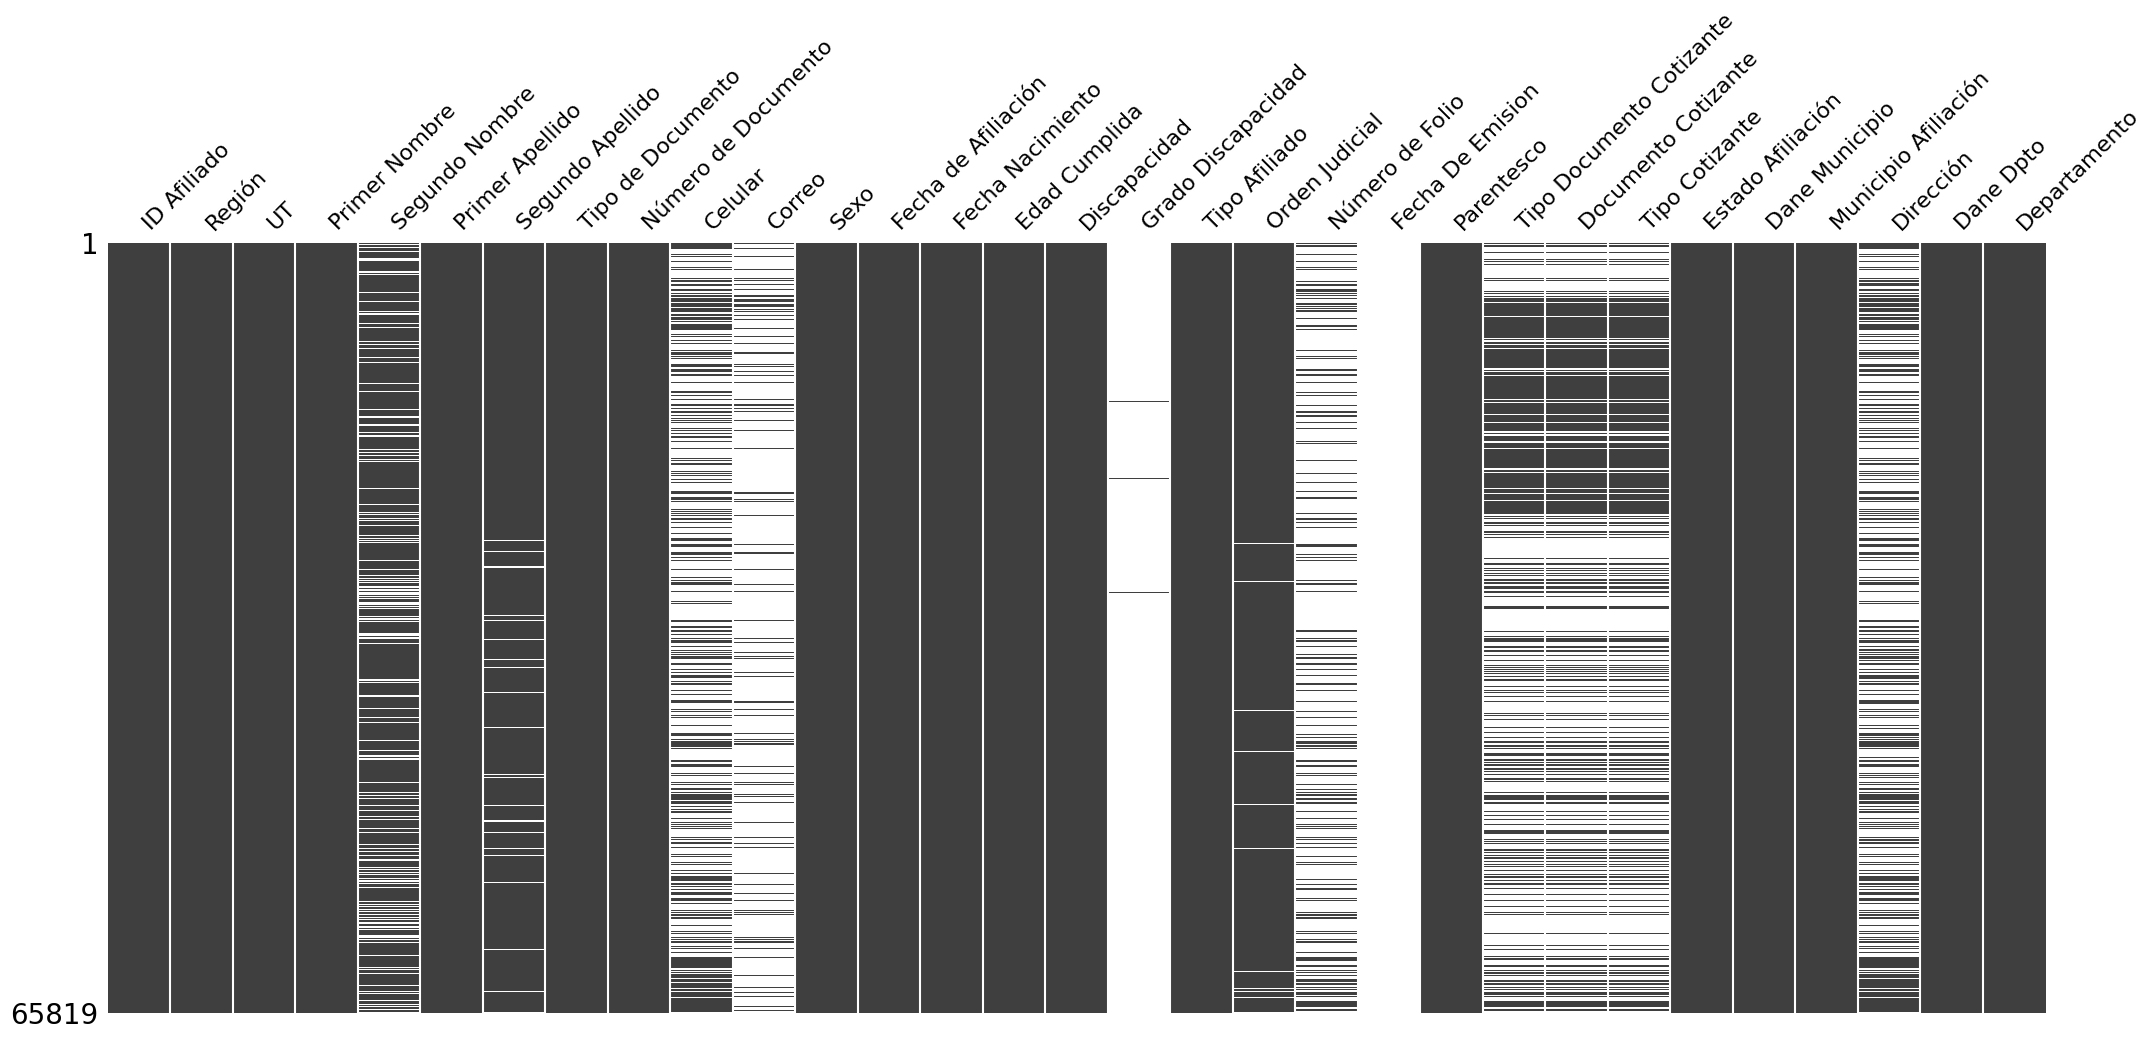

In [9]:
msno.matrix(pacientes_df, sparkline=False)
print("*************** {} ***************".format(pacientes_df.name))
print(pacientes_df.info())
print(pacientes_df.describe(include="all").T)

# **Data Preparation**

### **DATA PREPARATION SETUP**

In [10]:
saving_paths = {
    "transformed_data": '../../data/processed/transformed_data',
    "clean_data": '../../data/processed/cleaned_data/Cleaned_data.csv'
}

cl = cl.Cleaning(saving_paths["clean_data"])
tr = tr.Transform(saving_paths["clean_data"], saving_paths["transformed_data"])

In [11]:
cl.run()
unified_df = cl.get_unified_df()
unified_df.name = 'unified df'
df_clean = cl.get_df_clean()
df_clean.name = 'clean df'
df = cl.get_df()
df.name = 'clean df'

------------------------------------------------
Cleaning...
Data successfully cleaned!
Clean data successfully saved in: ../../data/processed/cleaned_data/Cleaned_data.csv
------------------------------------------------


### **UNIFIED DATA DRAME**

*************** clean df ***************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7169 entries, 0 to 1871
Data columns (total 59 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Grupo de Riesgo                                                     7169 non-null   object 
 1   CodDepto                                                            7169 non-null   object 
 2   FechaNovedadFallecido                                               7169 non-null   object 
 3   Edad                                                                7169 non-null   object 
 4   Cod_Género                                                          7169 non-null   object 
 5   Tipo de Discapacidad                                                7169 non-null   object 
 6   Condición de Discapacidad                                           716

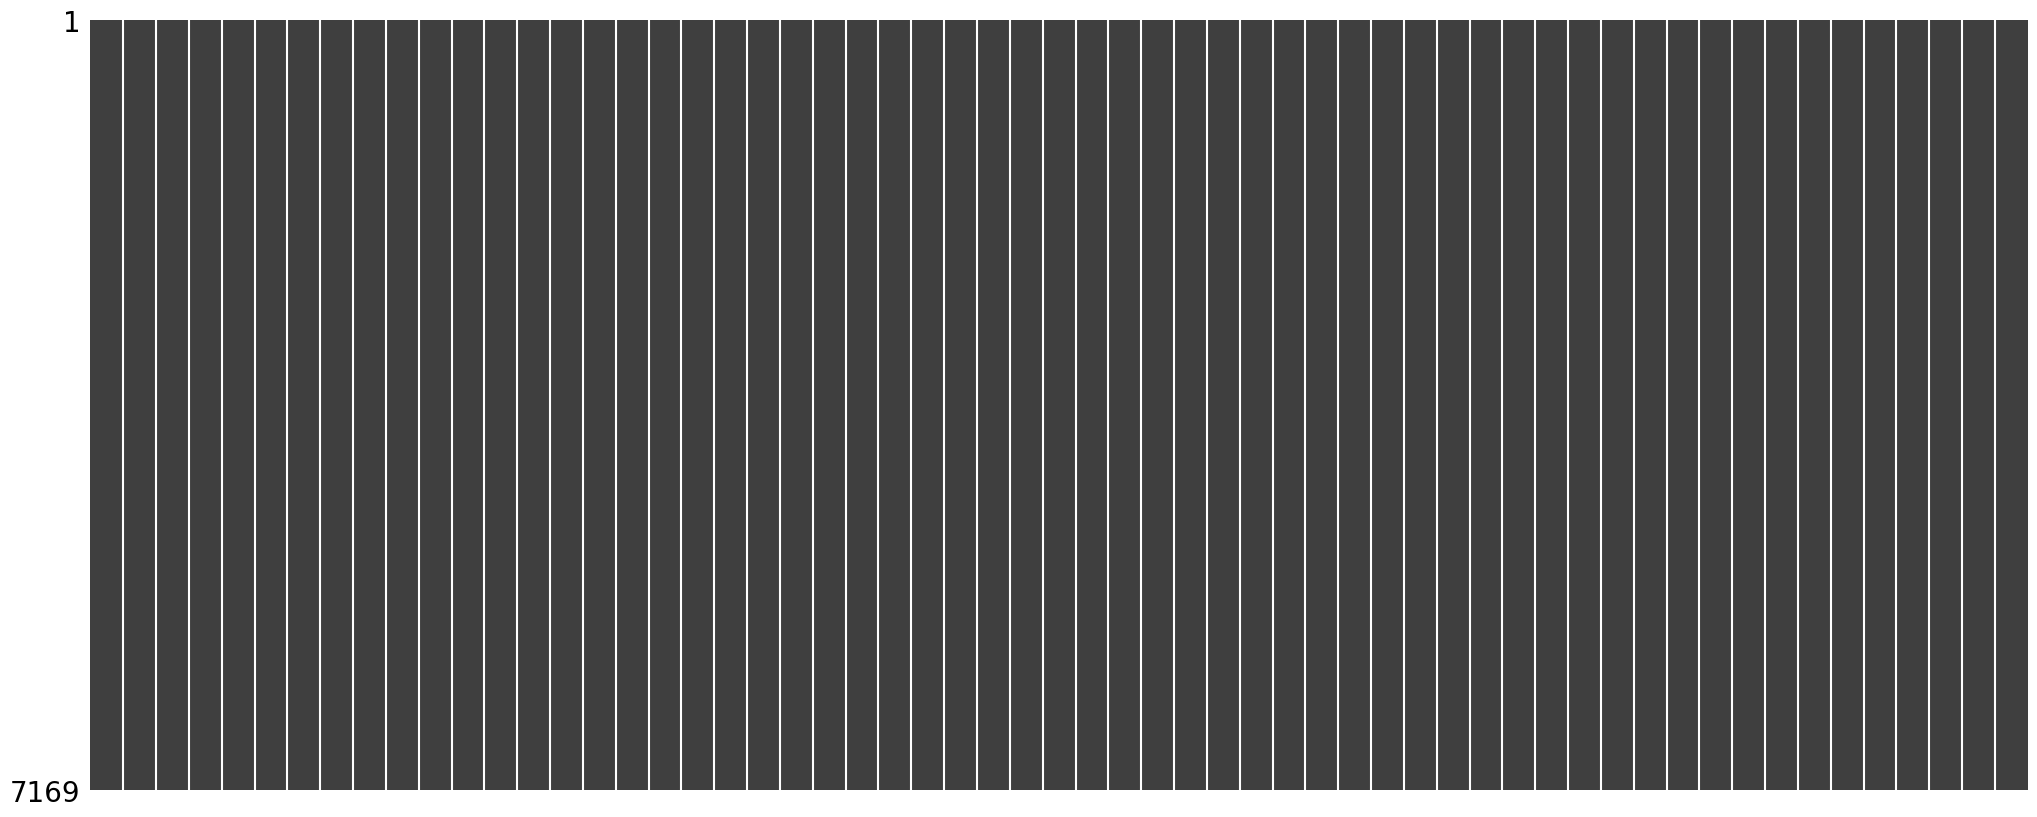

In [12]:
msno.matrix(unified_df, sparkline=False)
print("*************** {} ***************".format(unified_df.name))
print(unified_df.info())
print(unified_df.describe(include="all").T)

### **Colums before fixing**

In [13]:
def print_col_info(df,columns):
    for col in columns:
        print("\n********************************************************************************")
        print("Column: {}".format(col))
        print("Unique values in {} column:".format(col))
        print(df[col].unique())
        print("Total Unique values:")
        print(len(df[col].unique()))
        print("Value counts for {} column:".format(col))
        print(df[col].value_counts())
        print("Data type of {} column:".format(col))
        print(df[col].dtype)
        print("********************************************************************************")

#['Grupo de Riesgo', 'CodDepto', 'FechaNovedadFallecido', 'Edad', 'Género', 'Cod_Género', 'Tipo de Discapacidad', 'Condición de Discapacidad', 'Pertenencia Étnica', 'Coomorbilidad', 'ADHERENCIA AL TRATAMIENTO', 'Fumador Activo', 'CONSUMO DE ALCOHOL', 'ENTREGA DE MEDICAMENTO OPORTUNA ', 'FARMACOS ANTIHIPERTENSIVOS', 'OTROS FARMACOS ANTIHIPERTENSIVOS', 'RECIBE IECA', 'RECIBE ARA II', 'ESTATINA', 'ANTIDIABETICOS', 'OTROS ANTIDIABETICOS', 'OTROS TRATAMIENTOS', 'OTROS DIAGNÓSTICOS', 'PESO', 'TALLA', 'IMC', 'OBESIDAD', 'CALCULO DE RIESGO DE Framingham (% a 10 años)', 'Clasificación de RCV Global', 'DX CONFIRMADO DE HIPERTENSIÓN ARTERIAL', 'CÓD_DIABETES', 'CLASIFICACION DIABETES', 'DIAGNÓSTICO DISLIPIDEMIAS', 'ANTECEDENTE FAMILIAR  DE ENFERMEDAD CARDIOVASCULAR', 'CÓD_ANTEDECENTE', 'PRESION ARTERIAL', 'COLESTEROL ALTO', 'HDL ALTO', 'CLASIFICACIÓN DE RIESGO CARDIOVASCULAR', 'CALCULO TFG ', 'CLASIFICACIÓN ESTADIO ', 'CREATININA SÉRICA (HOMBRES > 1.7 MG/DL - MUJERES > 1.4 MG/DL) _DIC', 'GLICEMIA 100 MG/DL_DIC', 'COLESTEROL TOTAL > 200 MG/DL_DIC', 'LDL > 130 MG/DL_DIC', 'HDL HOMBRE - 40 MG/DL Y HDL MUJER - 50 MG/DL_DIC', 'TGD > 150 MG/DL_DIC', 'ALBUMINURIA/CREATINURIA', 'HEMOGLOBINA GLICOSILADA > DE 7%', 'HEMOGRAMA', 'POTASIO', 'MICROALBINURIA', 'CREATINURIA', 'UROANALIS', 'PERIMETRO ABDOMINAL', 'Complicación Cardiaca', 'Complicación Cerebral', 'Complicación Retinianas', 'Complicación Vascular', 'Complicación Renales']
print_col_info(unified_df,  list(unified_df))


********************************************************************************
Column: Grupo de Riesgo
Unique values in Grupo de Riesgo column:
['POBLACIÓN CON RIESGO O ALTERACIONES CARDIO – CEREBRO – VASCULAR – METABÓLICAS MANIFIESTAS']
Total Unique values:
1
Value counts for Grupo de Riesgo column:
POBLACIÓN CON RIESGO O ALTERACIONES CARDIO – CEREBRO – VASCULAR – METABÓLICAS MANIFIESTAS    7169
Name: Grupo de Riesgo, dtype: int64
Data type of Grupo de Riesgo column:
object
********************************************************************************

********************************************************************************
Column: CodDepto
Unique values in CodDepto column:
['86' '52' '18']
Total Unique values:
3
Value counts for CodDepto column:
52    4441
18    1872
86     856
Name: CodDepto, dtype: int64
Data type of CodDepto column:
object
********************************************************************************

************************************************

## Coomorbilidad

In [14]:
col_coomorbilidad = unified_df['Coomorbilidad']
col_coomorbilidad = col_coomorbilidad.str.split(r'\s*\+\s*', expand=True)
print_col_info(col_coomorbilidad, col_coomorbilidad)


********************************************************************************
Column: 0
Unique values in 0 column:
['SIN DATO' 'ACV' 'OBESIDAD' 'DISLIPIDEMIA' 'ARRITMIA CARDIACA'
 'PREDIABETES' 'ERC' 'DM INSULINODEPENDIENTE' 'HIPOTIROIDISMO'
 'TRANSPLANTE RENAL' 'ANTECEDENTE DE CA DE MAMA' 'CA DE COLON' 'DM2'
 'EPOC' 'HIPERCOLESTEROLEMIA' 'ACV(OBSTRUCCION DE VALVULA MITRAL)'
 'MARCAPASO' 'ALZHEIMER' 'ICC' 'LIPIDEMIA' 'DM' 'LINFOMA HODKING'
 'HIPERGLICEMIA' 'CARDIOPATIA' 'LESIONES NODULARES TIROIDEAS TIRADS 5'
 'ARTRITIS' 'ANSIEDAD' 'HTA' 'SIN CLASIFICAR']
Total Unique values:
29
Value counts for 0 column:
HTA                                      4260
DM                                       1365
SIN DATO                                  803
SIN CLASIFICAR                            677
OBESIDAD                                   11
ERC                                         9
HIPOTIROIDISMO                              9
HIPERCOLESTEROLEMIA                         6
DM INSULINODEPE

In [15]:
all_columns = pd.concat([col_coomorbilidad[0],col_coomorbilidad[1],col_coomorbilidad[2],], axis=0)
print("ALL UNIQUE VALUES OF COMORBILIDAD")
print(all_columns.unique())
print("*********************************")

df_temp = pd.DataFrame({'disease': all_columns})

systems = {
    'cardiovascular': [
        'ACV', 'ARRITMIA CARDIACA', 'ACV (OBSTRUCCION DE VALVULA MITRAL)', 
        'ICC', 'CARDIOPATIA-ANTECEDENTE DE REVASCULARIZACION MIOCARDICA', 
        'IAM', 'ANTECEDENTE DE ACV'
    ],
    'endocrine': [
        'HIPOTIROIDISMO', 'DM INSULINODEPENDIENTE', 'HIPERGLICEMIA', 
        'DM', 'HIPERLIPIDEMIA'
    ],
    'renal': [
        'IRC', 'TRANSPLANTE RENAL', 'ERC'
    ],
    'respiratory': [
        'EPOC'
    ],
    'cancer': [
        'ANTECEDENTE DE CA DE MAMA', 'CA DE COLON', 'LINFOMA HODGKIN'
    ],
    'neurological': [
        'ALZHEIMER'
    ],
    'psychiatric': [
        'ANSIEDAD DEPRESION'
    ],
    'obesity': [
        'OBESIDAD'
    ],
    'thyroid': [
        'LESIONES NODULARES TIROIDEAS TIRADS 5', 'HIPOTIROIDISMO'
    ],
    'arthritis': [
        'ARTRITIS'
    ],
    'unclassified': [
        'SIN DATO', 'SIN CLASIFICAR', None
    ],
    'lipid metabolism': [
        'DISLIPIDEMIA', 'HIPERCOLESTEROLEMIA', 'LIPIDEMIA', 'DISLIPIDEMIAS'
    ],
    'other': [
        'PREDIADETES', 'MARCAPASO'
    ]
}

for system, diseases in systems.items():
    df_temp[system] = df_temp['disease'].apply(lambda x: 1 if x in diseases else 0)

df_temp.drop(columns=['disease'], inplace=True)

print(df_temp.info())



ALL UNIQUE VALUES OF COMORBILIDAD
['SIN DATO' 'ACV' 'OBESIDAD' 'DISLIPIDEMIA' 'ARRITMIA CARDIACA'
 'PREDIABETES' 'ERC' 'DM INSULINODEPENDIENTE' 'HIPOTIROIDISMO'
 'TRANSPLANTE RENAL' 'ANTECEDENTE DE CA DE MAMA' 'CA DE COLON' 'DM2'
 'EPOC' 'HIPERCOLESTEROLEMIA' 'ACV(OBSTRUCCION DE VALVULA MITRAL)'
 'MARCAPASO' 'ALZHEIMER' 'ICC' 'LIPIDEMIA' 'DM' 'LINFOMA HODKING'
 'HIPERGLICEMIA' 'CARDIOPATIA' 'LESIONES NODULARES TIROIDEAS TIRADS 5'
 'ARTRITIS' 'ANSIEDAD' 'HTA' 'SIN CLASIFICAR' None 'IAM' 'DISLIPIDEMIAS'
 'ANTECEDENTE DE REVASCULARIZACION MIOCARDICA' 'ANTECEDENTE DE ACV'
 'DEPRESION' 'HIPERLIPIDEMIA']
*********************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21507 entries, 0 to 1871
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   cardiovascular    21507 non-null  int64
 1   endocrine         21507 non-null  int64
 2   renal             21507 non-null  int64
 3   respiratory       2150

## FARMACOS ANTIHIPERTENSIVOS

In [16]:
print_col_info(unified_df,  ['FARMACOS ANTIHIPERTENSIVOS'])


********************************************************************************
Column: FARMACOS ANTIHIPERTENSIVOS
Unique values in FARMACOS ANTIHIPERTENSIVOS column:
['IECA O ARA' 'ARA' 'SIN DATO' 'HCTZ+ARA O IECA+AMLODIPINO'
 'HCTZ+ARA+AMLODIPINO' 'HCTZ+ARA O IECA+AMLODIPINO+OTRO' 'HCTZ+AMLODIPINO'
 'OTRO' 'HCTZ+ARA O IECA' 'NAN' 'HCTZ' 'HCTZ+ARA' 'HCTZ+AMLODIPINO+ARA'
 'ARA+AMLODIPINO' 'IECA' 'AMLODIPINO UNICAMENTE' 'ARA+ASA' 'HTCA+ARA'
 'AMLODIPINO' 'RETIRADO' 'IECA O ARA+HTZ+AMLODIPINO' 'HCTZ+CANDESARTAN'
 'ARA O IECA' 'MANEJO NO FARMACOLOGICO' 'HCTZ+IECA O ARA+AMLODIPINO'
 'ARA+HCTZ+AMLOPDIPINO' 'LOSARTAN' 'ARA+HCTZ+AMLODIPINO' 'ENALAPRIL'
 'HIDROCLOROTIAZIDA+ARA' 'HIDROCLOROTIAZIDA (HCTZ)' 'IECA Ó ARA'
 'HCTZ+ARA Ó IECA+AMLODIPINO' 'HCTZ+ARA Ó IECA'
 'PARA MANEJO NO FARMACOLÓGICO']
Total Unique values:
35
Value counts for FARMACOS ANTIHIPERTENSIVOS column:
SIN DATO                           1955
IECA Ó ARA                         1116
NAN                                1001
PA

In [17]:
data = unified_df
# Replace less frequent values with 'Other'
replace_dict = {'HCTZ+ARA o IECA+AMLODIPINO': 'Other',
                'HCTZ+ARA o IECA+Amlodipino+ Otro': 'Other',
                'HCTZ+AMLODIPINO': 'Other',
                'OTRO': 'Other',
                'HCTZ+AMLODIPINO+ARA': 'Other',
                'HCTZ+ARA': 'Other',
                'ARA + AMLODIPINO': 'Other',
                'ARA+AMLODIPINO': 'Other',
                'ARA+ASA': 'Other',
                'HTCA + ARA ': 'Other',
                'AMLODIPINO ': 'Other',
                'RETIRADO': 'Other',
                'IECA O ARA + HTZ +AMLODIPINO': 'Other',
                'HCTZ+ARA O IECA': 'Other',
                'HCTZ+CANDESARTAN ': 'Other',
                'Sin Dato': 'Other',
                'ARA O IECA ': 'Other',
                'Manejo no farmacologico': 'Other',
                'HCTZ+IECA O ARA+AMLODIPINO': 'Other',
                'ARA +HCTZ+AMLOPDIPINO': 'Other',
                'HCTZ+ ARA': 'Other',
                'LOSARTAN': 'Other',
                'ARA+HCTZ+AMLODIPINO': 'Other',
                'ENALAPRIL': 'Other',
                'HIDROCLOROTIAZIDA + ARA': 'Other',
                'IECA ó ARA': 'Other',
                'HCTZ + ARA ó IECA + AMLODIPINO': 'Other',
                'HCTZ + ARA ó IECA': 'Other',
                'HCTZ + ARA O IECA + AMLODIPINO + OTRO': 'Other',
                'Para manejo no farmacológico': 'Other'
                }
data['FARMACOS ANTIHIPERTENSIVOS'] = data['FARMACOS ANTIHIPERTENSIVOS'].replace(replace_dict)
print_col_info(unified_df,  ['FARMACOS ANTIHIPERTENSIVOS'])


********************************************************************************
Column: FARMACOS ANTIHIPERTENSIVOS
Unique values in FARMACOS ANTIHIPERTENSIVOS column:
['IECA O ARA' 'ARA' 'SIN DATO' 'HCTZ+ARA O IECA+AMLODIPINO'
 'HCTZ+ARA+AMLODIPINO' 'HCTZ+ARA O IECA+AMLODIPINO+OTRO' 'Other' 'NAN'
 'HCTZ' 'IECA' 'AMLODIPINO UNICAMENTE' 'HTCA+ARA' 'AMLODIPINO'
 'IECA O ARA+HTZ+AMLODIPINO' 'HCTZ+CANDESARTAN' 'ARA O IECA'
 'MANEJO NO FARMACOLOGICO' 'ARA+HCTZ+AMLOPDIPINO' 'HIDROCLOROTIAZIDA+ARA'
 'HIDROCLOROTIAZIDA (HCTZ)' 'IECA Ó ARA' 'HCTZ+ARA Ó IECA+AMLODIPINO'
 'HCTZ+ARA Ó IECA' 'PARA MANEJO NO FARMACOLÓGICO']
Total Unique values:
24
Value counts for FARMACOS ANTIHIPERTENSIVOS column:
SIN DATO                           1955
IECA Ó ARA                         1116
NAN                                1001
PARA MANEJO NO FARMACOLÓGICO        984
Other                               469
HCTZ+ARA Ó IECA                     442
HIDROCLOROTIAZIDA (HCTZ)            363
IECA O ARA               

### **CLEAN DATA DRAME**

*************** clean df ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7169 entries, 0 to 7168
Data columns (total 59 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Grupo de Riesgo                                                     7169 non-null   object 
 1   CodDepto                                                            7169 non-null   object 
 2   FechaNovedadFallecido                                               7169 non-null   object 
 3   Edad                                                                7169 non-null   object 
 4   Cod_Género                                                          7169 non-null   object 
 5   Tipo de Discapacidad                                                7169 non-null   object 
 6   Condición de Discapacidad                                           716

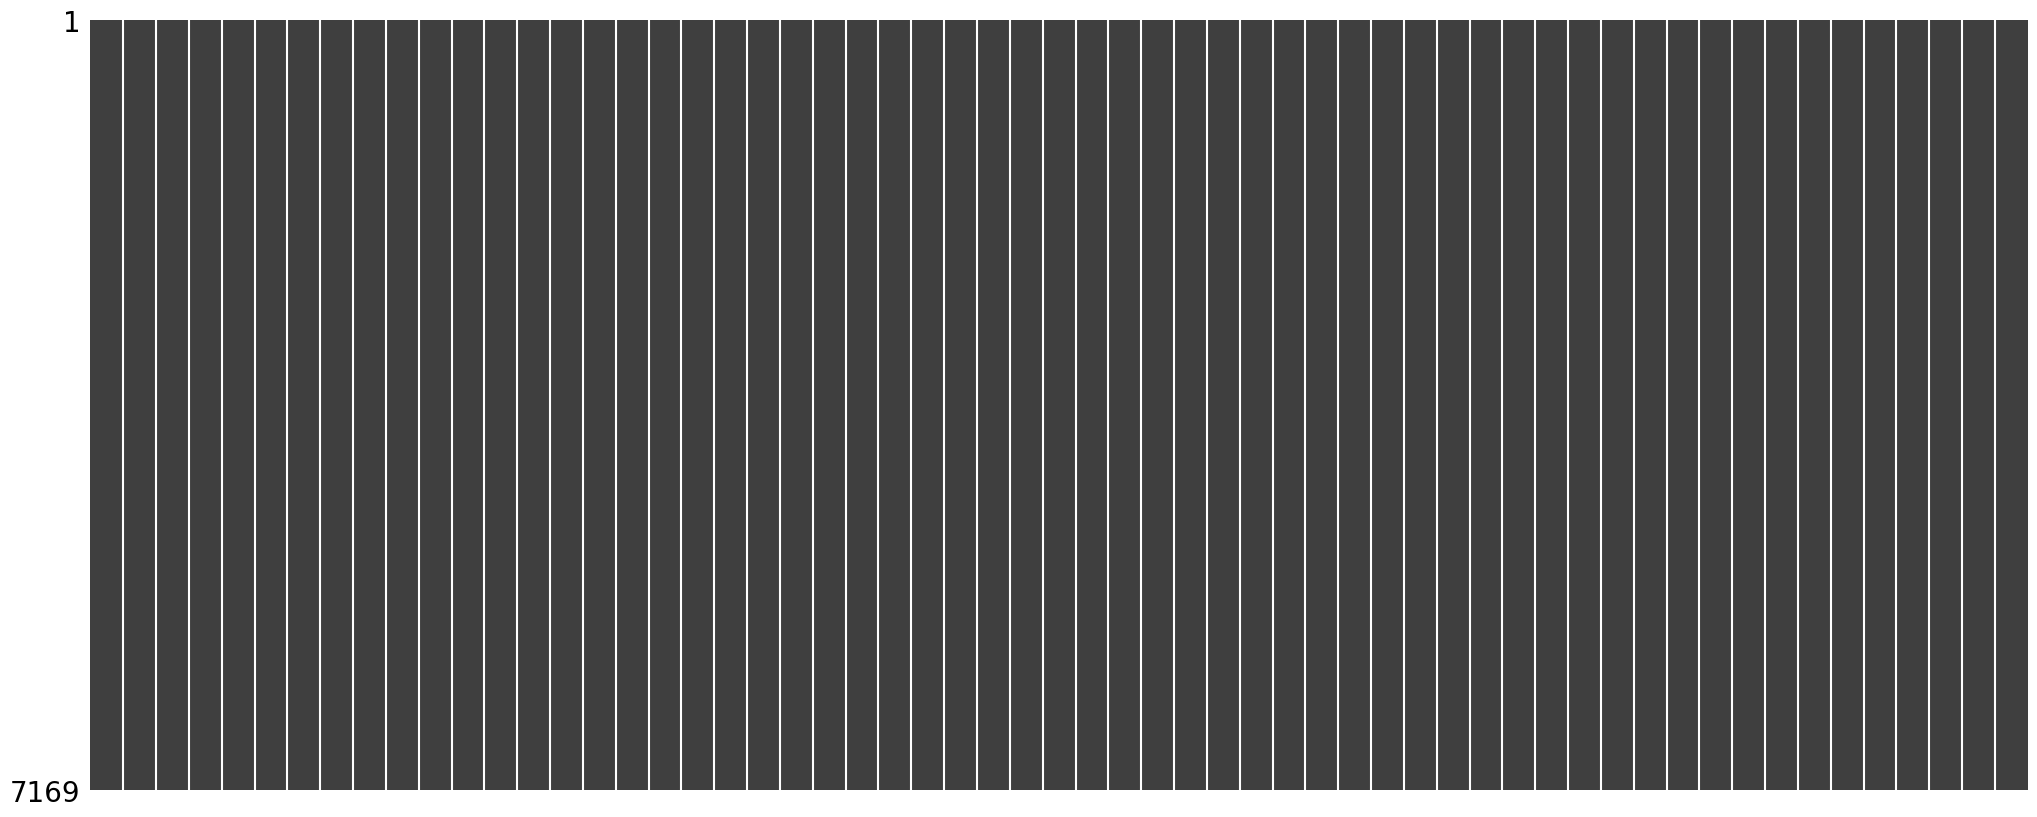

In [18]:
msno.matrix(df_clean, sparkline=False)
print("*************** {} ***************".format(df_clean.name))
print(df_clean.info())
print(df_clean.describe(include="all").T)

## **TRANSFORMED DATA FRAME**

In [19]:
tr.run()
transformed_df = tr.get_df_transformed()
transformed_df.name = 'transformed df' 
X_train = tr.get_x_train_transformed()
X_train.name = 'X_train df' 
X_val = tr.get_x_val_transformed()
X_val.name = 'X_val df'
X_test = tr.get_x_test_transformed()
X_test.name = 'X_test df'
y_val = tr.get_y_val_transformed()
y_val.name = 'y_val df'
y_test = tr.get_y_test_transformed()
y_test.name = 'y_test df'
y_train = tr.get_y_train_transformed()
y_train.name = 'y_train df'


------------------------------------------------
Transforming...


TypeError: cannot concatenate object of type '<class 'int'>'; only Series and DataFrame objs are valid

### **Colums after fixing**

In [ ]:
print_col_info(df,  list(df))


********************************************************************************
Column: Grupo de Riesgo
Unique values in Grupo de Riesgo column:
['Población con riesgo o alteraciones cardio – cerebro – vascular – metabólicas manifiestas']
Total Unique values:
1
Value counts for Grupo de Riesgo column:
Población con riesgo o alteraciones cardio – cerebro – vascular – metabólicas manifiestas    7169
Name: Grupo de Riesgo, dtype: int64
Data type of Grupo de Riesgo column:
object
********************************************************************************

********************************************************************************
Column: CodDepto
Unique values in CodDepto column:
[86 52 18]
Total Unique values:
3
Value counts for CodDepto column:
52    4441
18    1872
86     856
Name: CodDepto, dtype: int64
Data type of CodDepto column:
int64
********************************************************************************

*******************************************************

*************** transformed df ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7169 entries, 0 to 7168
Columns: 513 entries, Grupo de Riesgo to OBESIDAD_SOBREPESO
dtypes: float64(9), int64(41), uint8(463)
memory usage: 5.9 MB
None
                            count       mean        std   min   25%   50%  \
Grupo de Riesgo            7169.0   0.000000   0.000000   0.0   0.0   0.0   
FechaNovedadFallecido      7169.0   0.005998   0.077220   0.0   0.0   0.0   
Edad                       2727.0  62.343601  11.802126  15.0  55.0  63.0   
Cod_Género                 7169.0   1.613754   0.486922   1.0   1.0   2.0   
ADHERENCIA AL TRATAMIENTO  7169.0   0.978658   0.216421   0.0   1.0   1.0   
...                           ...        ...        ...   ...   ...   ...   
OBESIDAD_BAJO PESO         7169.0   0.003906   0.062378   0.0   0.0   0.0   
OBESIDAD_NORMAL            7169.0   0.162226   0.368684   0.0   0.0   0.0   
OBESIDAD_OBESIDAD          7169.0   0.236016   0.424662   

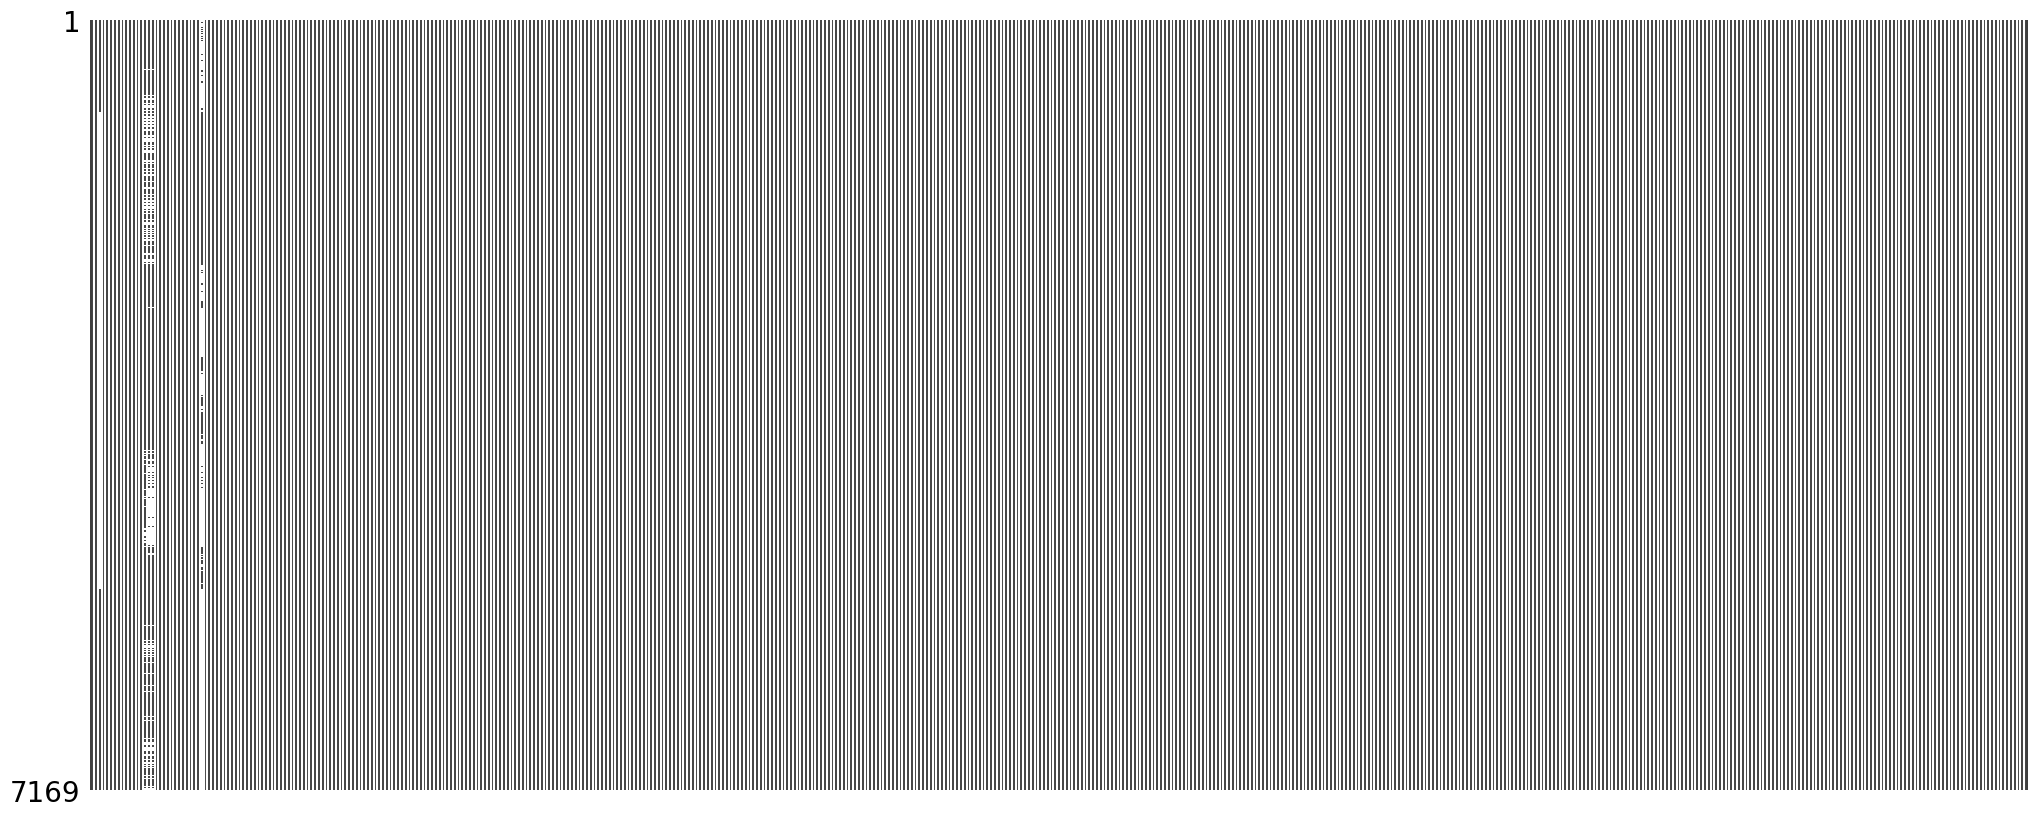

In [ ]:
msno.matrix(transformed_df, sparkline=False)
print("*************** {} ***************".format(transformed_df.name))
print(transformed_df.info())
print(transformed_df.describe(include="all").T)

In [ ]:
print("*************** {} ***************".format(X_train.name))
print(X_train.info())
print(X_train.describe(include="all").T)

*************** X_train df ***************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4301 entries, 6936 to 1654
Columns: 512 entries, Grupo de Riesgo to OBESIDAD_SOBREPESO
dtypes: float64(9), int64(40), uint8(463)
memory usage: 3.5 MB
None
                            count       mean        std   min   25%   50%  \
Grupo de Riesgo            4301.0   0.000000   0.000000   0.0   0.0   0.0   
FechaNovedadFallecido      4301.0   0.005348   0.072940   0.0   0.0   0.0   
Edad                       1639.0  62.116534  11.539991  24.0  55.0  63.0   
Cod_Género                 4301.0   1.621716   0.485015   1.0   1.0   2.0   
ADHERENCIA AL TRATAMIENTO  4301.0   0.979540   0.220042   0.0   1.0   1.0   
...                           ...        ...        ...   ...   ...   ...   
OBESIDAD_BAJO PESO         4301.0   0.003953   0.062752   0.0   0.0   0.0   
OBESIDAD_NORMAL            4301.0   0.163683   0.370031   0.0   0.0   0.0   
OBESIDAD_OBESIDAD          4301.0   0.235062   0.424087   0

In [ ]:
print("*************** {} ***************".format(X_val.name))
print(X_val.info())
print(X_val.describe(include="all").T)

*************** X_val df ***************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 897 to 4428
Columns: 512 entries, Grupo de Riesgo to OBESIDAD_SOBREPESO
dtypes: float64(9), int64(40), uint8(463)
memory usage: 1.2 MB
None
                            count       mean        std   min   25%   50%  \
Grupo de Riesgo            1434.0   0.000000   0.000000   0.0   0.0   0.0   
FechaNovedadFallecido      1434.0   0.006974   0.083245   0.0   0.0   0.0   
Edad                        531.0  63.020716  12.091848  20.0  56.0  64.0   
Cod_Género                 1434.0   1.605997   0.488806   1.0   1.0   2.0   
ADHERENCIA AL TRATAMIENTO  1434.0   0.974198   0.221089   0.0   1.0   1.0   
...                           ...        ...        ...   ...   ...   ...   
OBESIDAD_BAJO PESO         1434.0   0.003487   0.058966   0.0   0.0   0.0   
OBESIDAD_NORMAL            1434.0   0.161088   0.367740   0.0   0.0   0.0   
OBESIDAD_OBESIDAD          1434.0   0.232218   0.422394   0.0 

In [ ]:
print("*************** {} ***************".format(X_test.name))
print(X_test.info())
print(X_test.describe(include="all").T)

*************** X_test df ***************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 6911 to 1706
Columns: 512 entries, Grupo de Riesgo to OBESIDAD_SOBREPESO
dtypes: float64(9), int64(40), uint8(463)
memory usage: 1.2 MB
None
                            count       mean        std   min   25%   50%  \
Grupo de Riesgo            1434.0   0.000000   0.000000   0.0   0.0   0.0   
FechaNovedadFallecido      1434.0   0.006974   0.083245   0.0   0.0   0.0   
Edad                        557.0  62.366248  12.273069  15.0  55.0  62.0   
Cod_Género                 1434.0   1.597629   0.490547   1.0   1.0   2.0   
ADHERENCIA AL TRATAMIENTO  1434.0   0.980474   0.200232   0.0   1.0   1.0   
...                           ...        ...        ...   ...   ...   ...   
OBESIDAD_BAJO PESO         1434.0   0.004184   0.064572   0.0   0.0   0.0   
OBESIDAD_NORMAL            1434.0   0.158996   0.365800   0.0   0.0   0.0   
OBESIDAD_OBESIDAD          1434.0   0.242678   0.428851   0.

In [ ]:
print("*************** {} ***************".format(y_train.name))
print(y_train.info())
print(y_train.describe(include="all").T)

*************** y_train df ***************
<class 'pandas.core.series.Series'>
Int64Index: 4301 entries, 6936 to 1654
Series name: y_train df
Non-Null Count  Dtype
--------------  -----
4301 non-null   int64
dtypes: int64(1)
memory usage: 67.2 KB
None
count    4301.000000
mean        3.398512
std         1.243116
min         0.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: y_train df, dtype: float64


In [ ]:
print("*************** {} ***************".format(y_val.name))
print(y_val.info())
print(y_val.describe(include="all").T)

*************** y_val df ***************
<class 'pandas.core.series.Series'>
Int64Index: 1434 entries, 897 to 4428
Series name: y_val df
Non-Null Count  Dtype
--------------  -----
1434 non-null   int64
dtypes: int64(1)
memory usage: 22.4 KB
None
count    1434.000000
mean        3.412831
std         1.247357
min         0.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: y_val df, dtype: float64


In [ ]:
print("*************** {} ***************".format(y_test.name))
print(y_test.info())
print(y_test.describe(include="all").T)

*************** y_test df ***************
<class 'pandas.core.series.Series'>
Int64Index: 1434 entries, 6911 to 1706
Series name: y_test df
Non-Null Count  Dtype
--------------  -----
1434 non-null   int64
dtypes: int64(1)
memory usage: 22.4 KB
None
count    1434.000000
mean        3.390516
std         1.253971
min         0.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: y_test df, dtype: float64


# **MODELS**

In [ ]:
data_split_paths = {
    "X_train": '../../data/processed/transformed_data/X_train.csv',
    "X_test": '../../data/processed/transformed_data/X_test.csv',
    "y_train": '../../data/processed/transformed_data/y_train.csv',
    "y_test": '../../data/processed/transformed_data/y_test.csv'
}

## **XGB**

In [ ]:
"""
param_grid = {'learning_rate': [0.1, 0.01], 'max_depth': [3, 5]}

"""
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 6, 9],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}
xgb_model = XGBModel(X_train, y_train, X_test, X_val, y_test, y_val, param_grid)
pred, model = xgb_model.run()

print(pred)
print(model)

TypeError: ('Unknown type:', [XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...), XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...), XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...), XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...), XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)])